Dataset Length:  14
Dataset Shape:  (14, 5)


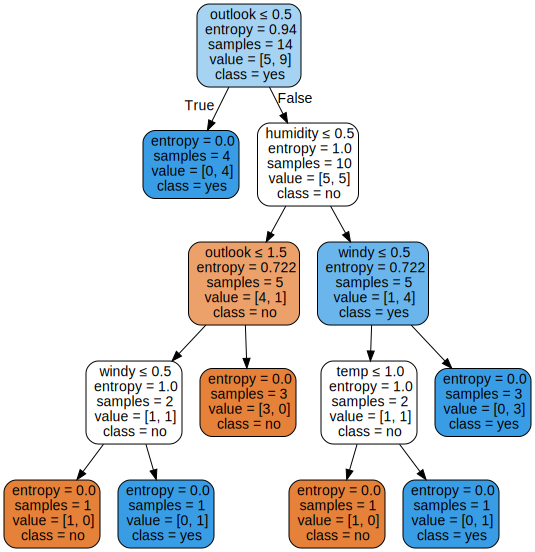

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
def importdata(path='/content/play_tennis.csv'):
    data = pd.read_csv(path, header=0, skiprows=0)
    print("Dataset Length: ", len(data))
    print("Dataset Shape: ", data.shape)
    return data

playtennis_data = importdata()
le = LabelEncoder()
playtennis_data['outlook'] = le.fit_transform(playtennis_data['outlook'])
playtennis_data['temp'] = le.fit_transform(playtennis_data['temp'])
playtennis_data['humidity'] = le.fit_transform(playtennis_data['humidity'])
playtennis_data['windy'] = le.fit_transform(playtennis_data['wind'])
playtennis_data['play'] = le.fit_transform(playtennis_data['play'])

X = playtennis_data[['outlook', 'temp', 'humidity', 'windy']]
y = playtennis_data['play']

# Create the classifier and train it
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X, y)

# Visualize the tree
dot_data = export_graphviz(tree, out_file=None, feature_names=['outlook', 'temp', 'humidity', 'windy'],
                           class_names=['no', 'yes'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph